<a href="https://colab.research.google.com/github/azizpambayun/project/blob/main/covid_19_analysis_and_visualization_in_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
!git clone 'https://github.com/azizpambayun/datasets'

fatal: destination path 'datasets' already exists and is not an empty directory.


In [92]:
!head datasets/covid_19_indonesia_time_series_all.csv

﻿Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5,44,267,,664,10846145,16334.31,106.8361183,-6.204698991,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,,
3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5,44,267,,664,10846145,16334.31,106.8361183,-6.204698991,0

In [93]:
content = '''Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths'''

columns_list = content.split('\n')
#for i in range(len(columns_list)):
  #columns_list[i] = columns_list[i].strip()

In [94]:
covid = pd.read_csv('datasets/covid_19_indonesia_time_series_all.csv', header=0, names=columns_list, index_col=False)
covid = covid.set_index('Location')
covid.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Province,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0


In [95]:
covid.info()
covid[0:7]

<class 'pandas.core.frame.DataFrame'>
Index: 21759 entries, DKI Jakarta to Indonesia
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location_ISO_Code            21759 non-null  object 
 2   New_Cases                    21759 non-null  int64  
 3   New_Deaths                   21759 non-null  int64  
 4   New_Recovered                21759 non-null  int64  
 5   New_Active_Cases             21759 non-null  int64  
 6   Total_Cases                  21759 non-null  int64  
 7   Total_Deaths                 21759 non-null  int64  
 8   Total_Recovered              21759 non-null  int64  
 9   Total_Active_Cases           21759 non-null  int64  
 10  Location_Level               21759 non-null  object 
 11  City_or_Regency              0 non-null      float64
 12  Province                     21117 non-null  object 
 13  Country

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Province,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0
Indonesia,3/3/2020,IDN,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0
Jawa Barat,3/3/2020,ID-JB,1,1,0,0,1,1,8,-8,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN


In [96]:
# We don't select all the column to make it easy to analyze
covid = covid[['Date','Location_ISO_Code','New_Cases','New_Deaths','Total_Cases','Total_Deaths',
               'Total_Recovered','New_Active_Cases','Total_Active_Cases','Longitude','Latitude']]
covid.head()

,Date,Location_ISO_Code,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Total_Recovered,New_Active_Cases,Total_Active_Cases,Longitude,Latitude
Location,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,39,20,41,2,-22,106.836118,-6.204699
DKI Jakarta,3/2/2020,ID-JK,2,0,41,20,41,2,-20,106.836118,-6.204699
Indonesia,3/2/2020,IDN,2,0,2,0,0,2,2,113.921327,-0.789275
Riau,3/2/2020,ID-RI,1,0,2,0,3,1,-1,101.805109,0.511648
DKI Jakarta,3/3/2020,ID-JK,2,0,43,20,41,2,-18,106.836118,-6.204699


In [97]:
# We convert the date column that still in object form into date type 
covid['Date'] = pd.to_datetime(covid['Date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21759 entries, DKI Jakarta to Indonesia
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                21759 non-null  datetime64[ns]
 1   Location_ISO_Code   21759 non-null  object        
 2   New_Cases           21759 non-null  int64         
 3   New_Deaths          21759 non-null  int64         
 4   Total_Cases         21759 non-null  int64         
 5   Total_Deaths        21759 non-null  int64         
 6   Total_Recovered     21759 non-null  int64         
 7   New_Active_Cases    21759 non-null  int64         
 8   Total_Active_Cases  21759 non-null  int64         
 9   Longitude           21759 non-null  float64       
 10  Latitude            21759 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 2.0+ MB


This graphic shows Indonesia's total confirmed cases, total recovered and fatalities:

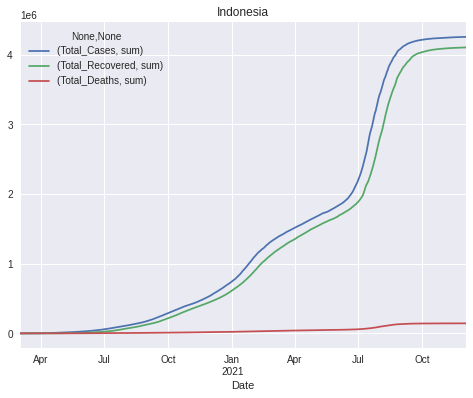

In [98]:
confirmed_cases = covid[covid['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
recovered = covid[covid['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities = covid[covid['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total = (confirmed_cases.join(recovered)).join(fatalities)

plt.style.use('seaborn')
total.plot(ax=plt.gca(), title='Indonesia', figsize =(8,6))

In [99]:
covid['Location_ISO_Code'].value_counts()

ID-JK    642
IDN      642
ID-RI    641
ID-JB    640
ID-BT    637
ID-JT    635
ID-SG    633
ID-BA    632
ID-KI    629
ID-YO    627
ID-SU    626
ID-JI    625
ID-SN    624
ID-JA    623
ID-KR    623
ID-PA    621
ID-MA    620
ID-SS    620
ID-AC    617
ID-KT    617
ID-LA    617
ID-ST    617
ID-SA    617
ID-SB    617
ID-PB    616
ID-MU    616
ID-KU    614
ID-SR    614
ID-KB    614
ID-KS    613
ID-BB    613
ID-NB    612
ID-BE    611
ID-NT    603
ID-GO    591
Name: Location_ISO_Code, dtype: int64

# Covid-19 total cases, recovered and fatalities in each province

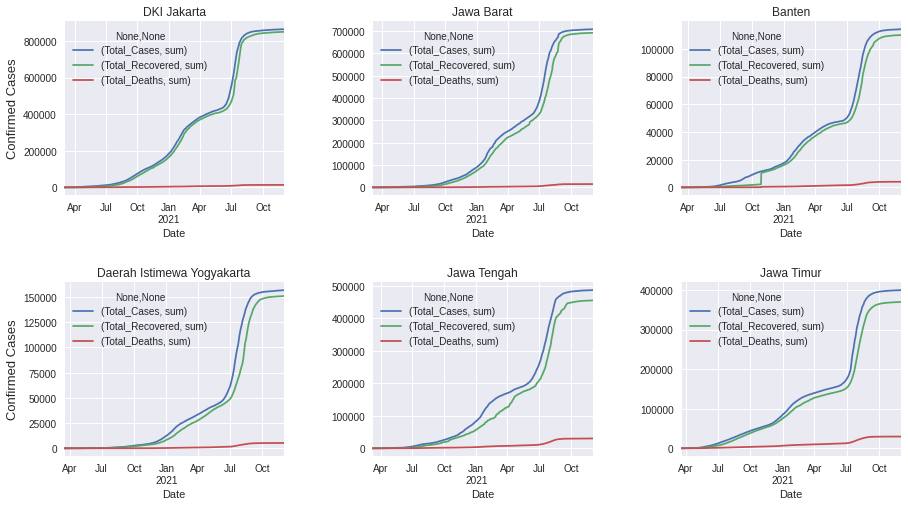

In [100]:
cc_jakarta = covid[covid['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_jakarta = covid[covid['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_jakarta = covid[covid['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jakarta = (cc_jakarta.join(rec_jakarta)).join(fatalities_jakarta)

cc_jabar = covid[covid['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_jabar = covid[covid['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_jabar = covid[covid['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jabar = (cc_jabar.join(rec_jabar)).join(fatalities_jabar)

cc_banten = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_banten = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_banten = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
banten = (cc_banten.join(rec_banten)).join(fatalities_banten)

cc_yogyakarta = covid[covid['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_yogyakarta = covid[covid['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_yogyakarta = covid[covid['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
yogyakarta = (cc_yogyakarta.join(rec_yogyakarta)).join(fatalities_yogyakarta)

cc_jateng = covid[covid['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_jateng = covid[covid['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_jateng = covid[covid['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jateng = (cc_jateng.join(rec_jateng)).join(fatalities_jateng)

cc_jatim = covid[covid['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_jatim = covid[covid['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_jatim = covid[covid['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jatim = (cc_jatim.join(rec_jatim)).join(fatalities_jatim)

plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
jakarta.plot(ax=plt.gca(), title='DKI Jakarta')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
jabar.plot(ax=plt.gca(), title='Jawa Barat')

plt.subplot(2,3,3)
banten.plot(ax=plt.gca(), title='Banten')

plt.subplot(2,3,4)
yogyakarta.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,5)
jateng.plot(ax=plt.gca(), title='Jawa Tengah')

plt.subplot(2,3,6)
jatim.plot(ax=plt.gca(), title='Jawa Timur')

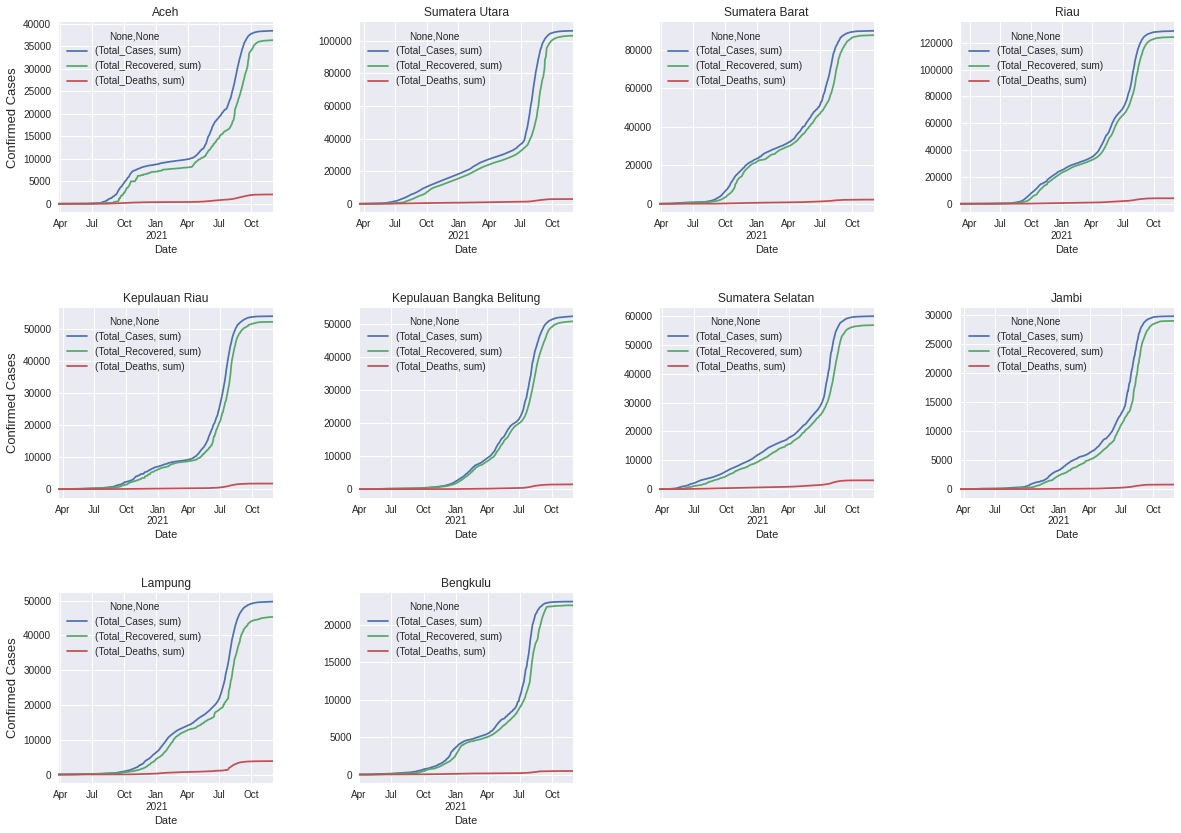

In [101]:
cc_aceh = covid[covid['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_aceh = covid[covid['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_aceh = covid[covid['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
aceh = (cc_aceh.join(rec_aceh)).join(fatalities_aceh)

cc_sumut = covid[covid['Location_ISO_Code']=='ID-SU'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sumut = covid[covid['Location_ISO_Code']=='ID-SU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sumut = covid[covid['Location_ISO_Code']=='ID-SU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sumut = (cc_sumut.join(rec_sumut)).join(fatalities_sumut)

cc_sumbar = covid[covid['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sumbar = covid[covid['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sumbar = covid[covid['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sumbar = (cc_sumbar.join(rec_sumbar)).join(fatalities_sumbar)

cc_riau = covid[covid['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_riau = covid[covid['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_riau = covid[covid['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
riau = (cc_riau.join(rec_riau)).join(fatalities_riau)

cc_kepri = covid[covid['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_kepri = covid[covid['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_kepri = covid[covid['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kepri = cc_kepri.join(rec_kepri).join(fatalities_kepri)

cc_babel = covid[covid['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_babel = covid[covid['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_babel = covid[covid['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
babel = (cc_babel.join(rec_babel)).join(fatalities_babel)

cc_sumsel = covid[covid['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sumsel = covid[covid['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sumsel = covid[covid['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sumsel = (cc_sumsel.join(rec_sumsel)).join(fatalities_sumsel)

cc_jambi = covid[covid['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_jambi = covid[covid['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_jambi = covid[covid['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jambi = (cc_jambi.join(rec_jambi)).join(fatalities_jambi)

cc_lampung = covid[covid['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_lampung = covid[covid['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_lampung = covid[covid['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
lampung = (cc_lampung.join(rec_lampung)).join(fatalities_lampung)

cc_bengkulu = covid[covid['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_bengkulu = covid[covid['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_bengkulu = covid[covid['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
bengkulu = (cc_bengkulu.join(rec_bengkulu)).join(fatalities_bengkulu)

plt.figure(figsize=(20,14))
plt.style.use('seaborn')
plt.subplot(3,4,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
aceh.plot(ax=plt.gca(), title='Aceh')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(3,4,2)
sumut.plot(ax=plt.gca(), title='Sumatera Utara')

plt.subplot(3,4,3)
sumbar.plot(ax=plt.gca(), title='Sumatera Barat')

plt.subplot(3,4,4)
riau.plot(ax=plt.gca(), title='Riau')

plt.subplot(3,4,5)
kepri.plot(ax=plt.gca(), title='Kepulauan Riau')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(3,4,6)
babel.plot(ax=plt.gca(), title='Kepulauan Bangka Belitung')

plt.subplot(3,4,7)
sumsel.plot(ax=plt.gca(), title='Sumatera Selatan')

plt.subplot(3,4,8)
jambi.plot(ax=plt.gca(), title='Jambi')

plt.subplot(3,4,9)
lampung.plot(ax=plt.gca(), title='Lampung')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(3,4,10)
bengkulu.plot(ax=plt.gca(), title='Bengkulu')

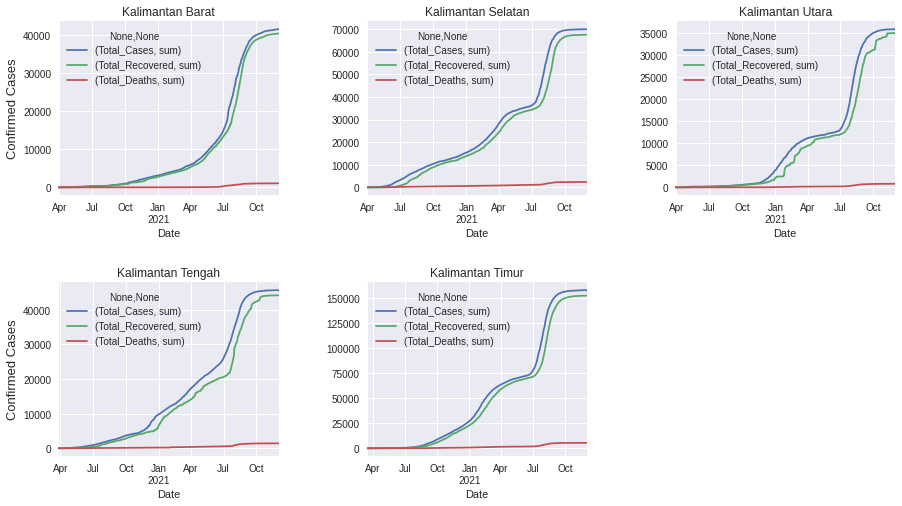

In [102]:
cc_kalbar = covid[covid['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_kalbar = covid[covid['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_kalbar = covid[covid['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalbar = (cc_kalbar.join(rec_kalbar)).join(fatalities_kalbar)

cc_kalsel = covid[covid['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_kalsel = covid[covid['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_kalsel = covid[covid['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalsel = (cc_kalsel.join(rec_kalsel)).join(fatalities_kalsel)

cc_kalut = covid[covid['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_kalut = covid[covid['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_kalut = covid[covid['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalut = (cc_kalut.join(rec_kalut)).join(fatalities_kalut)

cc_kalteng = covid[covid['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_kalteng = covid[covid['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_kalteng = covid[covid['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalteng = (cc_kalteng.join(rec_kalteng)).join(fatalities_kalteng)

cc_kaltim = covid[covid['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_kaltim = covid[covid['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_kaltim = covid[covid['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kaltim = (cc_kaltim.join(rec_kaltim)).join(fatalities_kaltim)

plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
kalbar.plot(ax=plt.gca(), title='Kalimantan Barat')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
kalsel.plot(ax=plt.gca(), title='Kalimantan Selatan')

plt.subplot(2,3,3)
kalut.plot(ax=plt.gca(), title='Kalimantan Utara')

plt.subplot(2,3,4)
kalteng.plot(ax=plt.gca(), title='Kalimantan Tengah')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,5)
kaltim.plot(ax=plt.gca(), title='Kalimantan Timur')

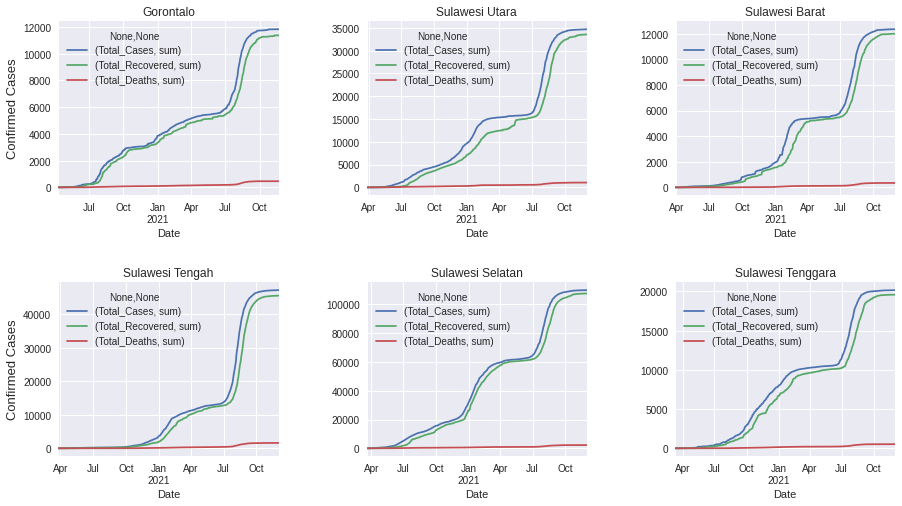

In [103]:
cc_gorontalo = covid[covid['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_gorontalo = covid[covid['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_gorontalo = covid[covid['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
gorontalo = (cc_gorontalo.join(rec_gorontalo)).join(fatalities_gorontalo)

cc_sulut = covid[covid['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sulut = covid[covid['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sulut = covid[covid['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulut = (cc_sulut.join(rec_sulut)).join(fatalities_sulut)

cc_sulbar = covid[covid['Location_ISO_Code']=='ID-SR'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sulbar = covid[covid['Location_ISO_Code']=='ID-SR'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sulbar = covid[covid['Location_ISO_Code']=='ID-SR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulbar = (cc_sulbar.join(rec_sulbar)).join(fatalities_sulbar)

cc_sulteng = covid[covid['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sulteng = covid[covid['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sulteng = covid[covid['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulteng = (cc_sulteng.join(rec_sulteng)).join(fatalities_sulteng)

cc_sulsel = covid[covid['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sulsel = covid[covid['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sulsel = covid[covid['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulsel = (cc_sulsel.join(rec_sulsel)).join(fatalities_sulsel)

cc_sultra = covid[covid['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_sultra = covid[covid['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_sultra = covid[covid['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sultra = (cc_sultra.join(rec_sultra)).join(fatalities_sultra)

plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
gorontalo.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
sulut.plot(ax=plt.gca(), title='Sulawesi Utara')

plt.subplot(2,3,3)
sulbar.plot(ax=plt.gca(), title='Sulawesi Barat')

plt.subplot(2,3,4)
sulteng.plot(ax=plt.gca(), title='Sulawesi Tengah')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,5)
sulsel.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2,3,6)
sultra.plot(ax=plt.gca(), title='Sulawesi Tenggara')

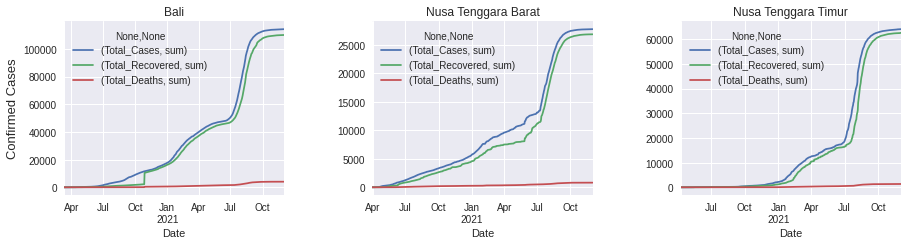

In [104]:
cc_bali = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_bali = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_bali = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
bali = (cc_bali.join(rec_bali)).join(fatalities_bali)

cc_ntb = covid[covid['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_ntb = covid[covid['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_ntb = covid[covid['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
ntb = (cc_ntb.join(rec_ntb)).join(fatalities_ntb)

cc_ntt = covid[covid['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_ntt = covid[covid['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_ntt = covid[covid['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
ntt = (cc_ntt.join(rec_ntt)).join(fatalities_ntt)

plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
bali.plot(ax=plt.gca(), title='Bali')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
ntb.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

plt.subplot(2,3,3)
ntt.plot(ax=plt.gca(), title='Nusa Tenggara Timur')

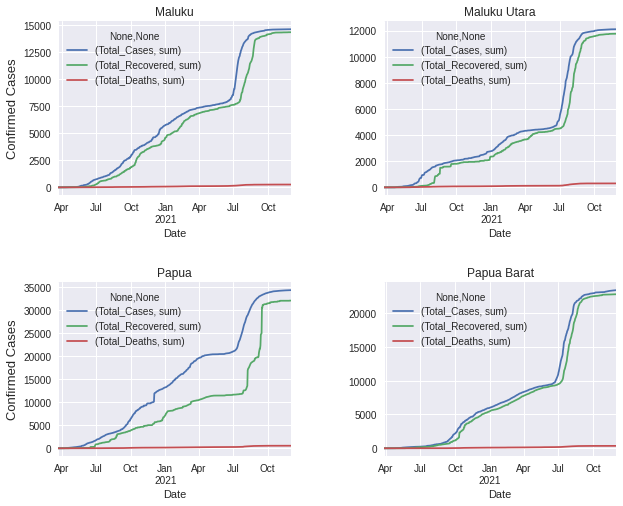

In [105]:
cc_maluku = covid[covid['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_maluku = covid[covid['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_maluku = covid[covid['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
maluku = (cc_maluku.join(rec_maluku)).join(fatalities_maluku)

cc_malut = covid[covid['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_malut = covid[covid['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_malut = covid[covid['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
malut = (cc_malut.join(rec_malut)).join(fatalities_malut)

cc_papua = covid[covid['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_papua = covid[covid['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_papua = covid[covid['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
papua = (cc_papua.join(rec_papua)).join(fatalities_papua)

cc_pbarat = covid[covid['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Cases':['sum']})
rec_pbarat = covid[covid['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_pbarat = covid[covid['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
pbarat = (cc_pbarat.join(rec_pbarat)).join(fatalities_pbarat)

plt.figure(figsize=(10,8))
plt.style.use('seaborn')
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
maluku.plot(ax=plt.gca(), title='Maluku')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,2,2)
malut.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2,2,3)
papua.plot(ax=plt.gca(), title='Papua')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,2,4)
pbarat.plot(ax=plt.gca(), title='Papua Barat')


In [106]:
!pip install geopandas
!pip install pandas_profiling
!pip install ipywidgets
!pip install widgetsnbextension

In [107]:
import geopandas as gpd
import seaborn as sns
import textwrap
from pandas_profiling import ProfileReport

In [108]:
df_covid = pd.read_csv('datasets/covid_19_indonesia_time_series_all.csv')
df_covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [109]:
df_covid.drop(["Location ISO Code", "New Cases", "New Deaths", "New Recovered", "New Active Cases", "Province", "Country", "Continent", "Island", "Time Zone", 
                "Special Status", "Total Regencies", "Total Cities", "Total Districts", "Total Urban Villages", "Total Rural Villages", "Area (km2)", 
                "New Cases per Million", "Total Cases per Million","New Deaths per Million", "Total Deaths per Million", "Case Fatality Rate",
                "Case Recovered Rate", "Growth Factor of New Cases","Growth Factor of New Deaths", "City or Regency"],axis=1,inplace=True)

In [110]:
df_covid.info()
df_covid[0:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    21759 non-null  object 
 1   Location                21759 non-null  object 
 2   Total Cases             21759 non-null  int64  
 3   Total Deaths            21759 non-null  int64  
 4   Total Recovered         21759 non-null  int64  
 5   Total Active Cases      21759 non-null  int64  
 6   Location Level          21759 non-null  object 
 7   Population              21759 non-null  int64  
 8   Population Density      21759 non-null  float64
 9   Longitude               21759 non-null  float64
 10  Latitude                21759 non-null  float64
 11  Total Deaths per 100rb  21759 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.0+ MB


,Date,Location,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,3/1/2020,DKI Jakarta,39,20,41,-22,Province,10846145,16334.31,106.836118,-6.204699,0.18
1,3/2/2020,DKI Jakarta,41,20,41,-20,Province,10846145,16334.31,106.836118,-6.204699,0.18
2,3/2/2020,Indonesia,2,0,0,2,Country,265185520,138.34,113.921327,-0.789275,0.00
3,3/2/2020,Riau,2,0,3,-1,Province,6074100,69.80,101.805109,0.511648,0.00
4,3/3/2020,DKI Jakarta,43,20,41,-18,Province,10846145,16334.31,106.836118,-6.204699,0.18


In [111]:
covid_new = df_covid.drop_duplicates(subset='Location', keep='last')
covid_new

,Date,Location,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21364,11/21/2021,Gorontalo,11834,460,11374,0,Province,1180651,104.88,122.376058,0.687003,38.96
21617,11/28/2021,Maluku Utara,12101,303,11757,41,Province,1307803,40.89,127.539107,0.212037,23.17
21700,12/1/2021,Bengkulu,23104,473,22612,19,Province,1999539,100.38,102.338421,-3.533584,23.66
21712,12/1/2021,Kalimantan Utara,35885,811,35039,35,Province,648407,8.59,116.218879,2.891013,125.08
21714,12/1/2021,Kepulauan Riau,53884,1748,52120,16,Province,1929400,235.24,108.261746,3.916346,90.60
21716,12/1/2021,Maluku,14587,261,14310,16,Province,1847097,39.37,129.576792,-3.192572,14.13
21722,12/1/2021,Sulawesi Barat,12353,346,12001,6,Province,1559984,92.93,119.345019,-2.461746,22.18
21730,12/2/2021,Aceh,38416,2066,36333,17,Province,5247257,90.54,96.910522,4.225615,39.37
21731,12/2/2021,Bali,114233,4046,110003,184,Province,4216171,729.43,115.131714,-8.369472,95.96
21732,12/2/2021,Banten,132693,2688,129872,133,Province,10722374,1109.64,106.109004,-6.456736,25.07


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
!ls "/content/drive/My Drive/project data"

gadm36_IDN_3.dbf  gadm36_IDN_3.shp  gadm36_IDN_3.shx  Peta.png


In [114]:
prov = gpd.read_file('drive/MyDrive/project data/gadm36_IDN_3.shp')
prov.drop(['NAME_0'], axis=1, inplace=True)
prov.rename(columns={'NAME_1':'Provinsi'}, inplace=True)
prov['Provinsi'].replace({'Jakarta Raya':'DKI Jakarta'}, inplace=True)

In [115]:
covid_new.rename(columns={'Location':'Provinsi'}, inplace=True)
covid_new

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Provinsi,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21364,11/21/2021,Gorontalo,11834,460,11374,0,Province,1180651,104.88,122.376058,0.687003,38.96
21617,11/28/2021,Maluku Utara,12101,303,11757,41,Province,1307803,40.89,127.539107,0.212037,23.17
21700,12/1/2021,Bengkulu,23104,473,22612,19,Province,1999539,100.38,102.338421,-3.533584,23.66
21712,12/1/2021,Kalimantan Utara,35885,811,35039,35,Province,648407,8.59,116.218879,2.891013,125.08
21714,12/1/2021,Kepulauan Riau,53884,1748,52120,16,Province,1929400,235.24,108.261746,3.916346,90.60
21716,12/1/2021,Maluku,14587,261,14310,16,Province,1847097,39.37,129.576792,-3.192572,14.13
21722,12/1/2021,Sulawesi Barat,12353,346,12001,6,Province,1559984,92.93,119.345019,-2.461746,22.18
21730,12/2/2021,Aceh,38416,2066,36333,17,Province,5247257,90.54,96.910522,4.225615,39.37
21731,12/2/2021,Bali,114233,4046,110003,184,Province,4216171,729.43,115.131714,-8.369472,95.96
21732,12/2/2021,Banten,132693,2688,129872,133,Province,10722374,1109.64,106.109004,-6.456736,25.07


In [116]:
covid_map = prov.merge(covid_new.sort_values(by='Provinsi'), on='Provinsi')

Text(0.5, 0.98, 'Covid Heatmap in Indonesia')

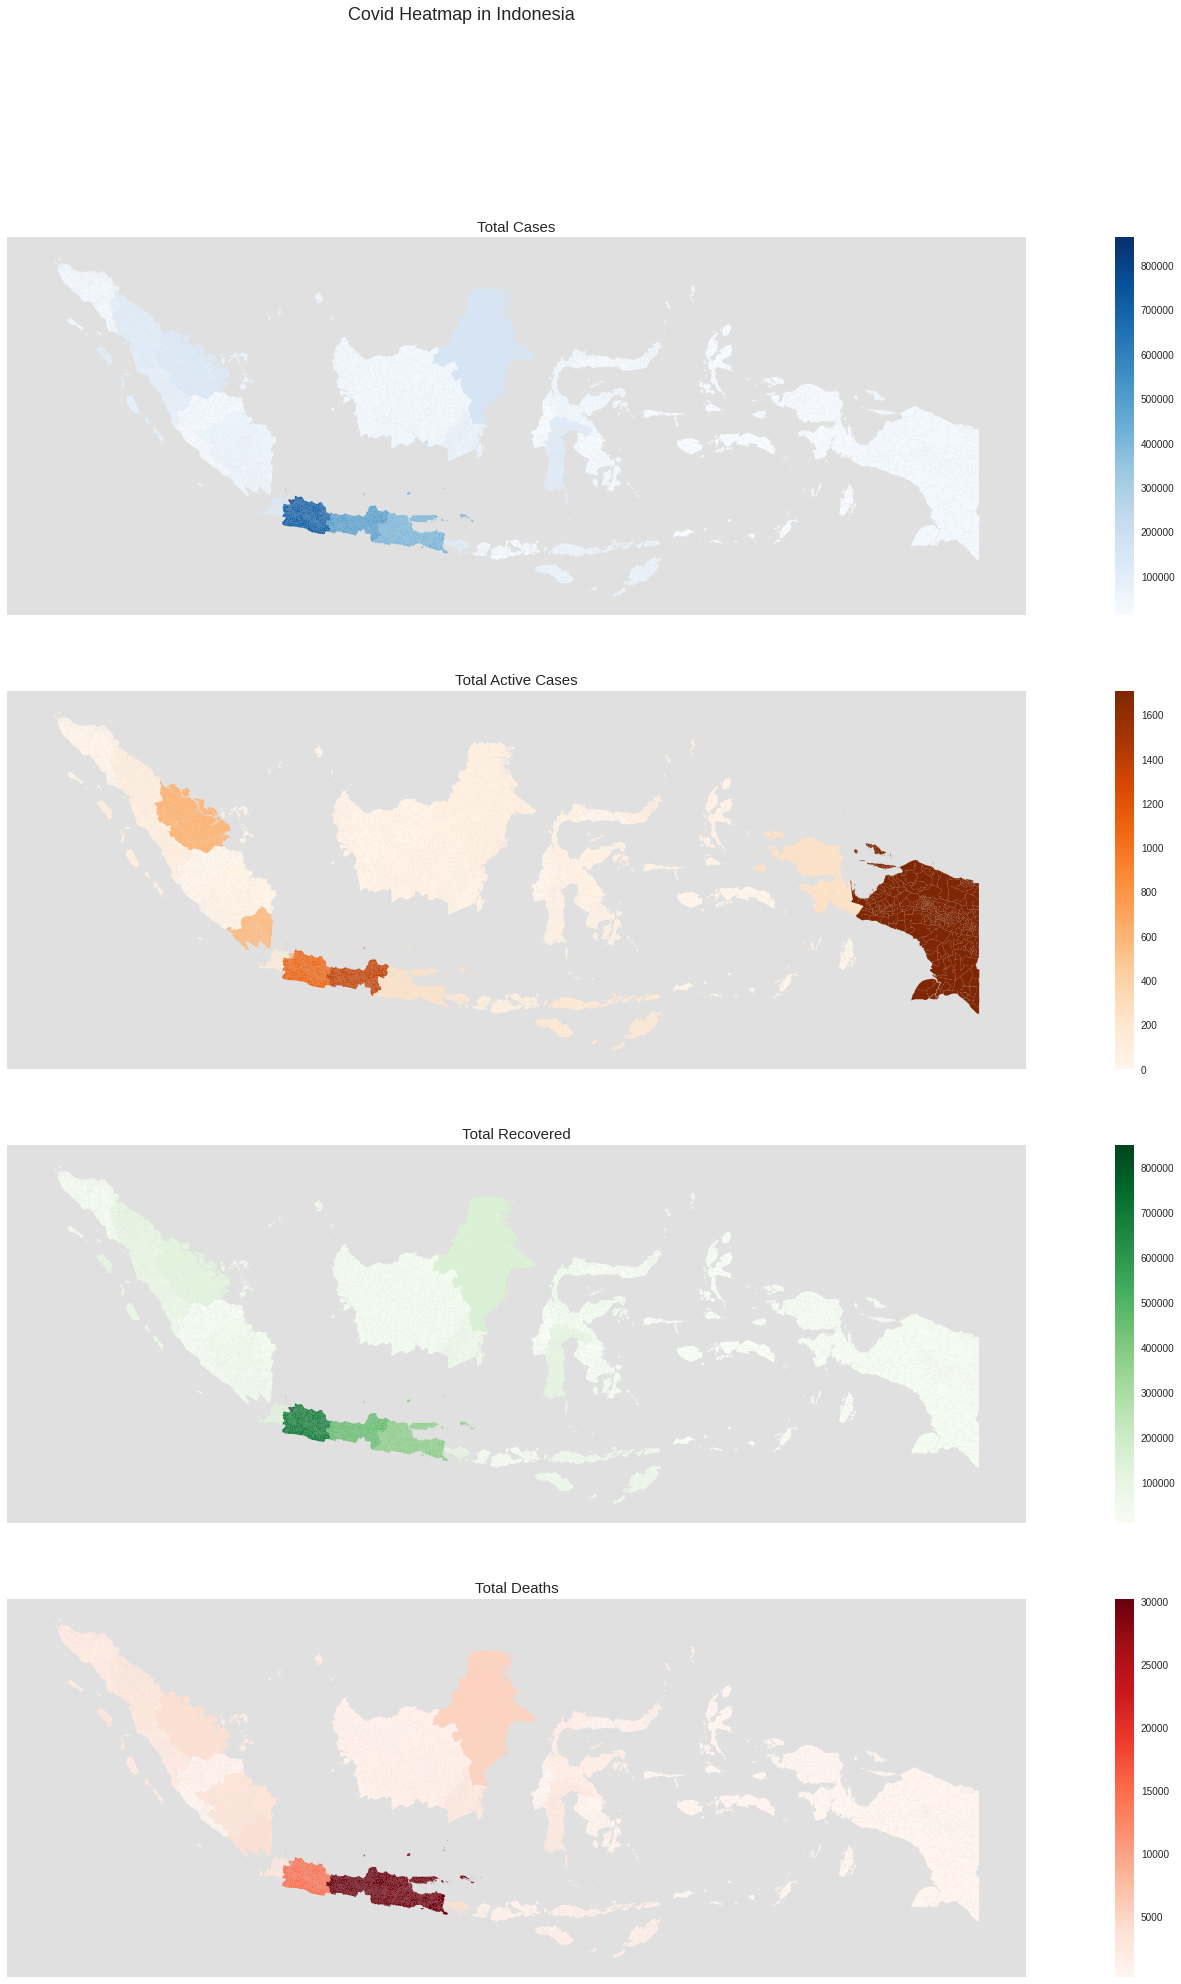

In [147]:
fig, ax = plt.subplots(4, figsize=(32,32))
plt.style.use('seaborn')
covid_map.plot(column='Total Cases', cmap='Blues', figsize=(9,32), legend=True, ax=ax[0])
ax[0].set_title('Total Cases', fontsize=15)
covid_map.plot(column='Total Active Cases', cmap='Oranges', figsize=(9,32), legend=True, ax=ax[1])
ax[1].set_title('Total Active Cases', fontsize=15)
covid_map.plot(column='Total Recovered', cmap='Greens', figsize=(9,32), legend=True, ax=ax[2])
ax[2].set_title('Total Recovered', fontsize=15)
covid_map.plot(column='Total Deaths', cmap='Reds', figsize=(9,32), legend=True, ax=ax[3])
ax[3].set_title('Total Deaths', fontsize=15)

ax[0].set_facecolor('#e0e0e0')
ax[1].set_facecolor('#e0e0e0')
ax[2].set_facecolor('#e0e0e0')
ax[3].set_facecolor('#e0e0e0')

for i in np.arange(4):
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].spines['left'].set_visible(False)
  ax[i].spines['bottom'].set_visible(False)
  for item in ax[i].get_xticklabels():
    item.set_visible(False)
  for item in ax[i].get_xticklabels():
    item.set_visible(False)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
fig.suptitle('Covid Heatmap in Indonesia', fontsize=18)
